<center>  
<h1> Data Analytics: Understanding Customers
    <center>

## Investigating Customer Buying Patterns  
-  Do customers in different regions spend more per transaction? Which regions spend the most/least?
    <br><br>
- Is there a relationship between number of items purchased and amount spent?
    <b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

<div id="about_dataset">
     <h2>About the dataset</h2>
    <br>
      <b>  In-store Column Mapping:</b>
      <br> 
   1: in-store purchases    <br>
   0: online purchases    <br>
    <br>
<b> Region Column Mapping:</b>
     <br>  
   1: North    <br>
   2: South    <br>
   3: East    <br>
   4: West    <br>


### Exploratory Data  Analysis (EDA)

In [3]:
df = pd.read_csv(r'C:\Users\andre\OneDrive\Andrés Márquez\UBIQUM\Project 1\Demographic_Data.csv')

In [4]:
df.head(5000).sort_values(by='amount', ascending=False)

,in-store,age,items,amount,region
4637,0,61,2,2998.6000,4
2283,0,47,4,2981.3000,4
4654,0,18,8,2981.1000,4
4440,0,36,3,2980.5000,3
1818,0,38,7,2978.5000,3
...,...,...,...,...,...
4096,0,54,6,7.1579,2
4520,0,42,3,6.6607,2
2162,0,64,6,5.7603,2
4072,0,46,4,5.6709,2


*We can see that there are some values with more than two decimals, this questions our method to calculate the "amount" variable. We were thinking it was a sum of all the items purchased, but maybe there are some other assumptions that we can make now, maybe there is an exchange currency conversion, maybe it is an average of a package of items sold, maybe it is a promotion.

We'll be creating two different columns for "region" and "in-store" to make cleaner visualizations for the CTO of Blackwells.

<b> Region <b>

In [5]:
# create a list of our conditions
conditions = [
    (df['region'] == 1),
    (df['region'] == 2),
    (df['region'] == 3),
    (df['region'] == 4)
    ]

# create a list of the values we want to assign for each condition
values = ['North', 'South', 'East', 'West']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Region_Name'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,in-store,age,items,amount,region,Region_Name
0,0,37,4,281.03,2,South
1,0,35,2,219.51,2,South
2,1,45,3,1525.70,4,West
3,1,46,3,715.25,3,East
4,1,33,4,1937.50,1,North


<b> In-Store <b>

In [6]:
# create a list of our conditions
conditions = [
    (df['in-store'] == 1),
    (df['in-store'] == 0),
    ]

# create a list of the values we want to assign for each condition
values = ['In-Store', 'Online']

# create a new column and use np.select to assign values to it using our lists as arguments
df['purchase'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,in-store,age,items,amount,region,Region_Name,purchase
0,0,37,4,281.03,2,South,Online
1,0,35,2,219.51,2,South,Online
2,1,45,3,1525.70,4,West,In-Store
3,1,46,3,715.25,3,East,In-Store
4,1,33,4,1937.50,1,North,In-Store


 Handling Missing Values

In [7]:
df.isnull().any()

in-store       False
age            False
items          False
amount         False
region         False
Region_Name    False
purchase       False
dtype: bool

In [8]:
df.isnull().sum().sum()

0

 Handling Duplicates

In [9]:
df = df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   in-store     79979 non-null  int64  
 1   age          79979 non-null  int64  
 2   items        79979 non-null  int64  
 3   amount       79979 non-null  float64
 4   region       79979 non-null  int64  
 5   Region_Name  79979 non-null  object 
 6   purchase     79979 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.9+ MB


*We can see that we dropped 21 observations due to being duplicates. Since we don't have the customers ID's, our assumption is that there's a small probability that an entire row is repeated, specially in the age column, maybe the same person bought in two different times the same items and spent the same amount, maybe not, maybe two different people with the same characteristics made the same purchase, since we don't know, and our dataset is large enough to not be affected by dropping 21 observations, we prefer to let them go.

In [11]:
df.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


#### Visualization

Histogram

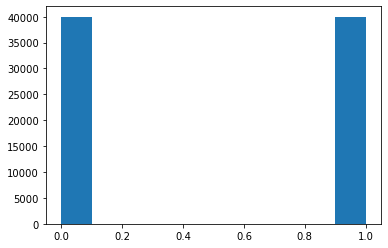

In [12]:
plt.hist(df['in-store'])
plt.show()

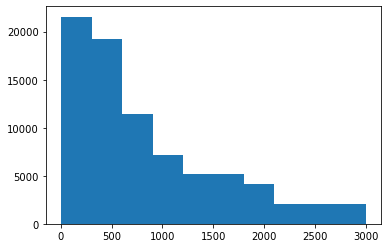

In [13]:
plt.hist(df['amount'])
plt.show()

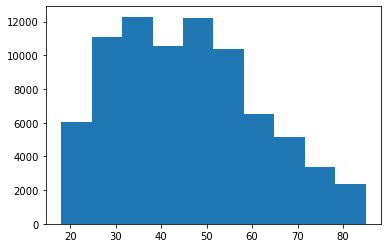

In [14]:
plt.hist(df['age'])
plt.show()

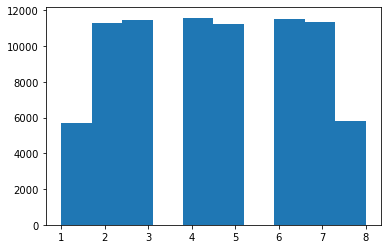

In [15]:
plt.hist(df['items'])
plt.show()

Scatter Plot (Age and amount spent)

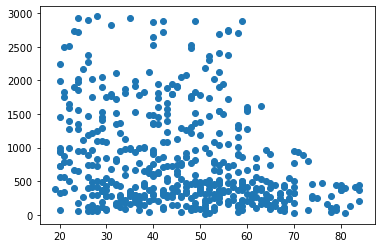

In [16]:
df_sample = df.sample(500)
x = df_sample['age']
y = df_sample['amount']
plt.scatter(x, y, marker = 'o')
plt.show()

*Doesn't look like we have a correlation between this two variables

Box-Plot

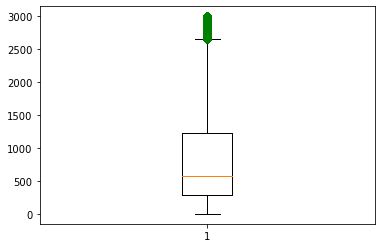

In [17]:
A = df['amount']
plt.boxplot(A,0,'gD')
plt.show()

Covariance matrix

In [18]:
cov_mat = df.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321


Correlation matrix

In [19]:
corr_mat = df.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


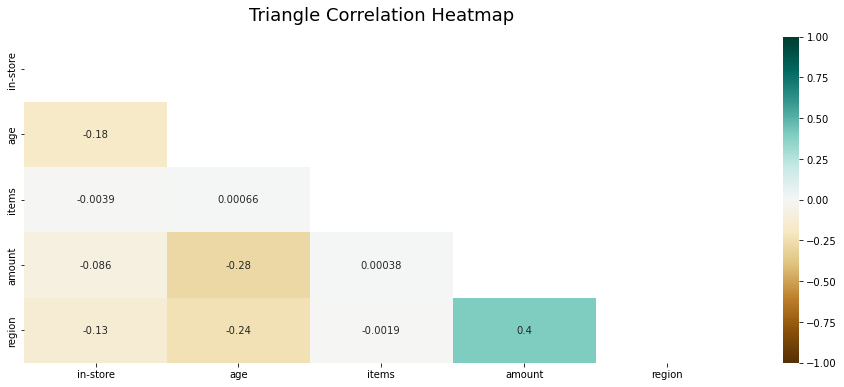

In [20]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

*Judging by the correlation matrix, there is a really low correlation between the number of items purchased and the amount spent. Also, an interest correlation between 'region' and 'amount', and a lower correlation, but still open to analysis between 'age' and 'amount'.

Number of purchases per region

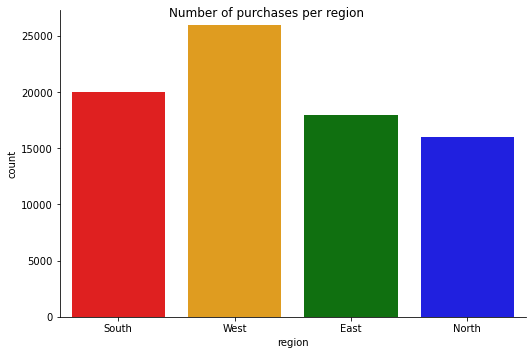

In [21]:
df.groupby('Region_Name')['items'].count()
fg = sns.factorplot('Region_Name', data=df, kind='count', aspect=1.5, palette = ['r', 'orange', 'g', 'b'])
fg.fig.suptitle('Number of purchases per region')
fg.set_xlabels('region')

*The west is the one with more purchases transactions, surprisingly followed by the south. Being the north the one with the least. This makes us think that the items purchased in the south are the ones with the lower price. This clarifies what our correlation matrix told us before.

Amount spent per region

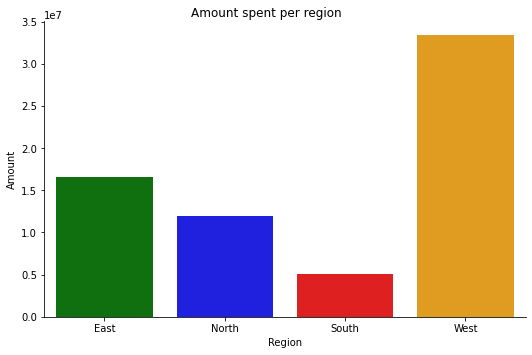

In [22]:
prueba = df.groupby(['Region_Name'])['amount'].sum()
prueba = pd.DataFrame(prueba)
prueba.reset_index(inplace=True)

fg = sns.factorplot('Region_Name', 'amount', data=prueba, kind='bar', aspect=1.5, palette= ['g', 'b','r', 'orange'])
fg.fig.suptitle('Amount spent per region')
fg.set_xlabels('Region')
fg.set_ylabels('Amount')

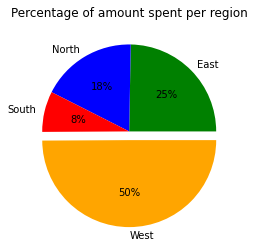

In [23]:
prueba2 = df.groupby(['Region_Name'])['amount'].sum()
prueba2 = pd.DataFrame(prueba2)
prueba2.reset_index(inplace=True)


explode = [0, 0, 0, 0.1]

# create pie chart using matplotlib
plt.title('Percentage of amount spent per region')
plt.pie(prueba2['amount'],labels= prueba2['Region_Name'], colors= ['g','b','r','orange'], explode= explode, shadow=False, autopct='%.0f%%', radius=1)

plt.show()

*We can see that the west is by far the region that spends the most followed by the east. Our main assumption is that this is happening because in both regions Blackwell offers In-store and online platforms to sell their products, so it's easier to reach more people through different strategies to make them buy your products.

Number of items purchased per region

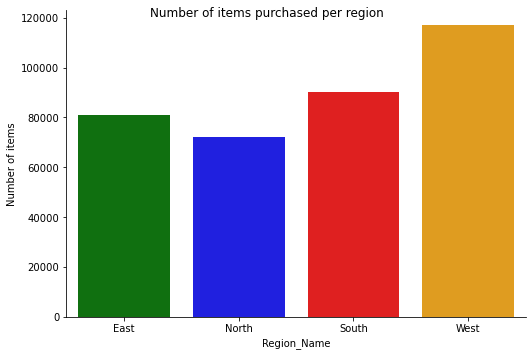

In [24]:
items_purchased = df.groupby(['Region_Name'])['items'].sum()
items_purchased = pd.DataFrame(items_purchased)
items_purchased.reset_index(inplace=True)

fg = sns.factorplot('Region_Name', 'items', data=items_purchased, kind='bar', aspect=1.5, palette= ['g', 'b', 'r', 'orange'])
fg.fig.suptitle('Number of items purchased per region')
fg.set_xlabels('Region_Name')
fg.set_ylabels('Number of items')

Number of in-store or online purchases per region

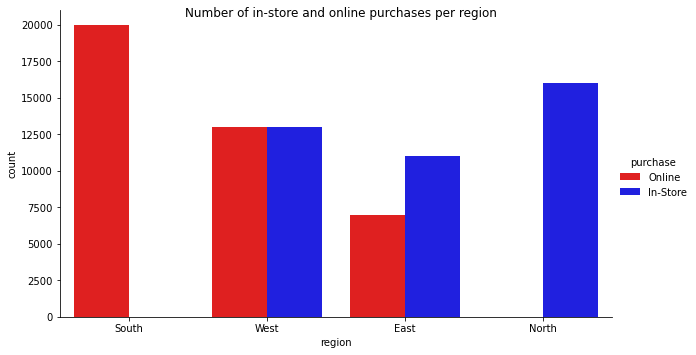

In [25]:
store_online = df.groupby(['purchase', 'Region_Name'])['in-store'].count()
store_online

g = sns.factorplot('Region_Name', data=df, hue='purchase', kind='count', aspect=1.75, palette=['r', 'b'])
g.fig.suptitle('Number of in-store and online purchases per region')
g.set_xlabels('region')

*The north only made in-store purchases while the south only made online purchases. The east made more online purchases and the west did almost the same amount of online and in-store purchases.

Number of items buyed in-store and online

In [26]:
df.groupby(['in-store', 'region'])['items'].sum()

in-store  region
0         2         90229
          3         31515
          4         58733
1         1         72151
          3         49377
          4         58311
Name: items, dtype: int64

Age Distribution

Text(0.5, 1.0, 'Distribution of Age')

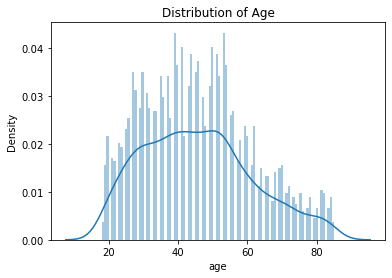

In [27]:
age_dist2 = sns.distplot(df['age'].sample(2000), bins=(100))
age_dist2.set_title("Distribution of Age")

In [28]:
from scipy import stats
stats.jarque_bera(df['age'])

Jarque_beraResult(statistic=3081.9632464257656, pvalue=0.0)

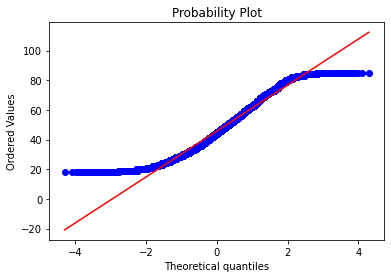

In [29]:
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100) ,stats.probplot(df['age'], dist="norm", plot=pylab)
pylab.show()

*Another way to see if it follows a normal distribution.

*Age doesn't follow a normal distribution.

Distribution of purchases in-store and online by age

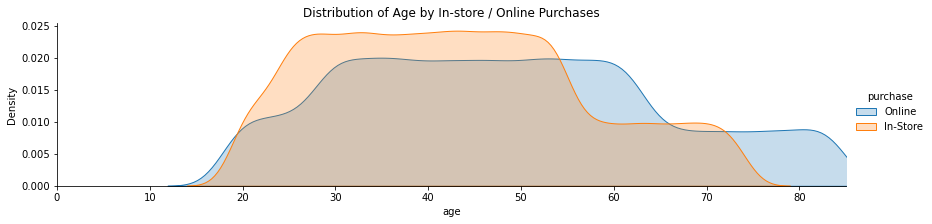

In [30]:
fig = sns.FacetGrid(df, hue='purchase', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = df['age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age by In-store / Online Purchases')
fig.add_legend()

*By plotting the distribution of "Age" grouped by In-Store and Online purchases we can see that between the ages of 18 to 55 there is a preference for making in-store purchases. Between 56-65 a preference for online purchases. From >65 we can see it is evenly distributed with >75 making only online purchases. 

Distribution of region by age

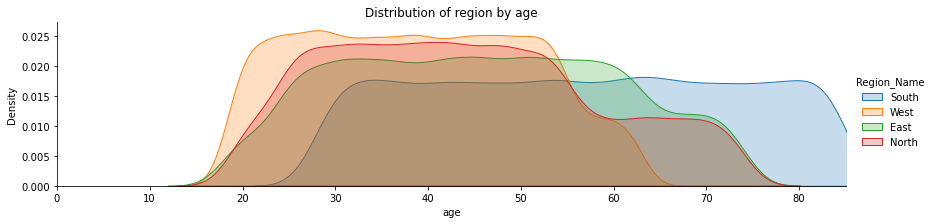

In [31]:
fig = sns.FacetGrid(df, hue='Region_Name', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = df['age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of region by age')
fig.add_legend()

*We can see that in the South we have a higher density of older people followed by the North and the East. The West is the one with the highest density of people around the age of 20-55.

*By looking at the previous plots we can see that people of age 75 and older live only in the south, so the only way they can purchase is via online.

<b> Factor plot <b>

Region factor Plot

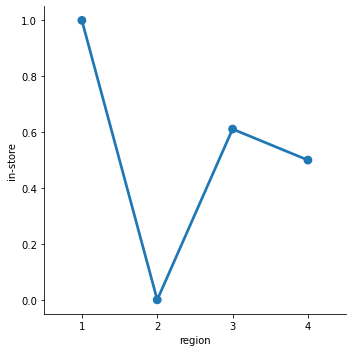

In [32]:
sns.factorplot(x ='region', y ='in-store', data = df)

*This factor plot shows us the percentage of purchases made in-store and online by region.

<b> Box-plots

<AxesSubplot:xlabel='Region_Name', ylabel='age'>

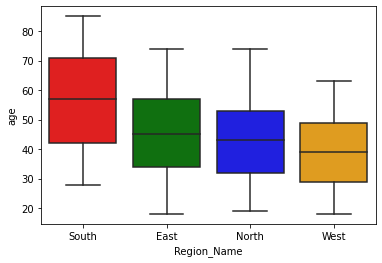

In [33]:
ranks = df.groupby("Region_Name")["age"].mean().fillna(0).sort_values()[::-1].index
sns.boxplot(x='Region_Name',y='age', data=df, order = ranks, palette=['r', 'g', 'b', 'orange'])

<AxesSubplot:xlabel='Region_Name', ylabel='amount'>

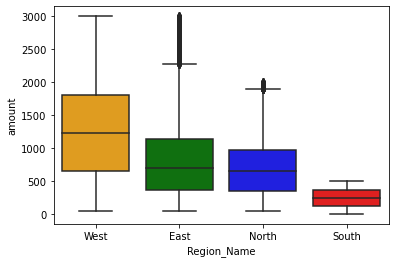

In [34]:
ranks2 = df.groupby("Region_Name")["amount"].mean().fillna(0).sort_values()[::-1].index
sns.boxplot(x='Region_Name',y='amount', data=df, order = ranks2, palette=['orange', 'g', 'b', 'r'])

<AxesSubplot:xlabel='purchase', ylabel='age'>

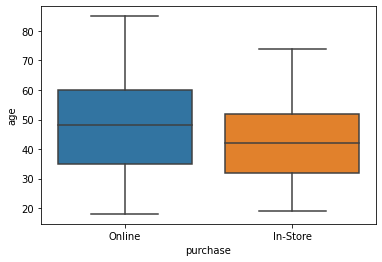

In [35]:
sns.boxplot(x='purchase',y='age', data=df)

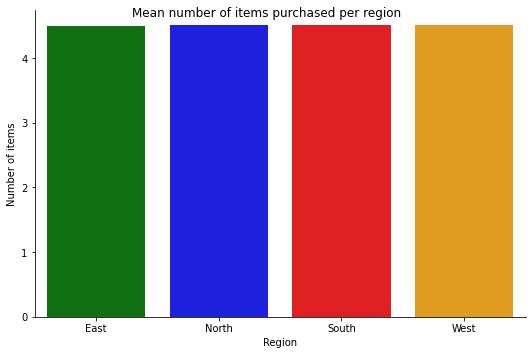

In [36]:
items_mean = df.groupby(['Region_Name'])['items'].mean()
items_mean = pd.DataFrame(items_mean)
items_mean.reset_index(inplace=True)

fg = sns.factorplot('Region_Name', 'items', data=items_mean, kind='bar', aspect=1.5, palette=['g', 'b', 'r', 'orange'])
fg.fig.suptitle('Mean number of items purchased per region')
fg.set_xlabels('Region')
fg.set_ylabels('Number of items')

In [37]:
items_mean

,Region_Name,items
0,East,4.494000
1,North,4.510283
2,South,4.512804
3,West,4.503771


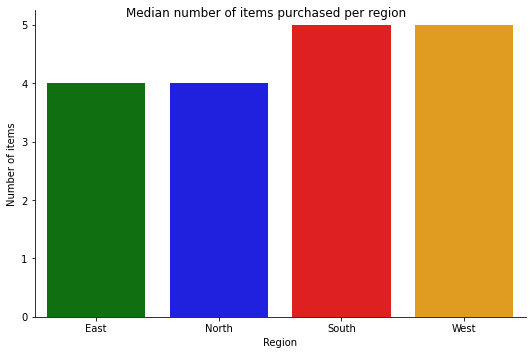

In [38]:
items_median = df.groupby(['Region_Name'])['items'].median()
items_median = pd.DataFrame(items_median)
items_median.reset_index(inplace=True)

fg = sns.factorplot('Region_Name', 'items', data=items_median, kind='bar', aspect=1.5, palette=['g', 'b', 'r', 'orange'])
fg.fig.suptitle('Median number of items purchased per region')
fg.set_xlabels('Region')
fg.set_ylabels('Number of items')

*It seems the variable "items" is not giving us much information about our clients. By looking at the mean, median and its low correlation with the other variables, we can see that it's not telling us much about our customers. We can <b> assume </b>  that the company may be selling some items in a promotion or "packages" and it could be one of the reasons for the amount having more than two decimals.

In [39]:
df2 = df[(df['region']==2) & (df['items']==1)][['items', 'Region_Name','amount']].sort_values(by='amount', ascending=False)
df2

,items,Region_Name,amount
67881,1,South,499.5800
51800,1,South,498.8800
10767,1,South,498.6400
14242,1,South,497.5000
12848,1,South,497.3300
...,...,...,...
66513,1,South,5.7216
35726,1,South,5.7020
50854,1,South,5.6588
77305,1,South,5.3366


In [40]:
df2 = df[df['items']==1][['items', 'Region_Name','amount', 'purchase']].sort_values(by='amount', ascending=False)
df2

,items,Region_Name,amount,purchase
64884,1,West,2998.6000,Online
59286,1,West,2993.5000,Online
34828,1,West,2988.8000,Online
46693,1,East,2987.4000,Online
45470,1,East,2986.9000,Online
...,...,...,...,...
66513,1,South,5.7216,Online
35726,1,South,5.7020,Online
50854,1,South,5.6588,Online
77305,1,South,5.3366,Online


Let's see if Blackwell is selling the same products online and in-store.

In [41]:
df3 = df[(df['items']==1) & (df['in-store']== 0)][['items', 'Region_Name','amount','purchase']].sort_values(by='amount', ascending=False)
df3

,items,Region_Name,amount,purchase
64884,1,West,2998.6000,Online
59286,1,West,2993.5000,Online
34828,1,West,2988.8000,Online
46693,1,East,2987.4000,Online
45470,1,East,2986.9000,Online
...,...,...,...,...
66513,1,South,5.7216,Online
35726,1,South,5.7020,Online
50854,1,South,5.6588,Online
77305,1,South,5.3366,Online


In [42]:
pd.set_option('display.max_rows', None)
df[(df['items']==1) & (df['in-store']== 0) & (df['region']== 2)][['items', 'Region_Name','amount','purchase']].sort_values(by='amount', ascending=False)

,items,Region_Name,amount,purchase
67881,1,South,499.5800,Online
51800,1,South,498.8800,Online
10767,1,South,498.6400,Online
14242,1,South,497.5000,Online
12848,1,South,497.3300,Online
50559,1,South,497.3200,Online
11009,1,South,497.1800,Online
74357,1,South,496.9800,Online
11873,1,South,496.6800,Online
46970,1,South,496.4800,Online


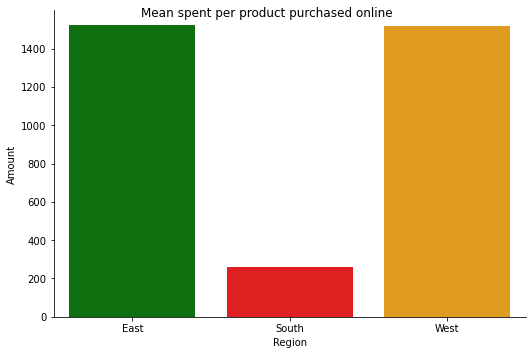

In [43]:
amount_mean = df3.groupby(['Region_Name'])['amount'].mean()
amount_mean = pd.DataFrame(amount_mean)
amount_mean.reset_index(inplace=True)

fg = sns.factorplot('Region_Name', 'amount', data=amount_mean, kind='bar', aspect=1.5, palette=['g','r', 'orange'])
fg.fig.suptitle('Mean spent per product purchased online')
fg.set_xlabels('Region')
fg.set_ylabels('Amount')

*After performing different analysis, we believe that Blackwells is not offering the same products online in the south region as in the west and east. It might be due to delivery conditions, something to think about. 

Now, before discarting our variable 'items' from our model, let's see if we have a correlation between items and amount spent in the West and East, where we assume Blackwells is selling the same products in-store and online.

In [44]:
pd.reset_option('^display.', silent=True)
df7 = df[(df['region']>= 3) & (df['region']<= 4)][['items', 'Region_Name','amount','purchase']].sort_values(by='amount', ascending=False)
df7

,items,Region_Name,amount,purchase
16478,7,East,3000.000,Online
60261,8,West,3000.000,Online
61166,5,East,2999.800,Online
61744,3,West,2999.700,Online
19432,6,West,2999.600,Online
...,...,...,...,...
40194,8,East,50.507,In-Store
42212,5,East,50.433,In-Store
49159,3,East,50.331,In-Store
24784,1,East,50.155,In-Store


In [45]:
df7.corr()

,items,amount
items,1.000000,0.004961
amount,0.004961,1.000000


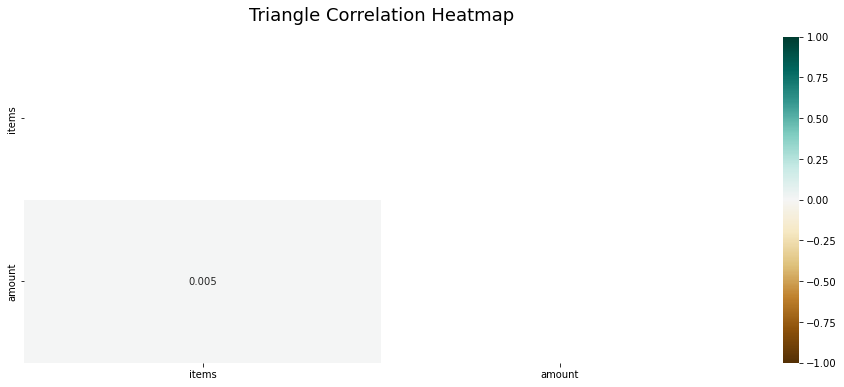

In [46]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask1 = np.triu(np.ones_like(df7.corr(), dtype=np.bool))
heatmap = sns.heatmap(df7.corr(), mask=mask1, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

*We can still confirm that there is no significant correlation between these variables, so our decision stands, items is not telling us much information about our clients.

In [47]:
df['amount'] = round(df['amount'], 2)
df.head(5000).sort_values(by='amount', ascending=False)

,in-store,age,items,amount,region,Region_Name,purchase
4637,0,61,2,2998.60,4,West,Online
2283,0,47,4,2981.30,4,West,Online
4654,0,18,8,2981.10,4,West,Online
4440,0,36,3,2980.50,3,East,Online
1818,0,38,7,2978.50,3,East,Online
...,...,...,...,...,...,...,...
4096,0,54,6,7.16,2,South,Online
4520,0,42,3,6.66,2,South,Online
2162,0,64,6,5.76,2,South,Online
4072,0,46,4,5.67,2,South,Online


### Conclusions

 * Customers in other regions do spend more/least per transaction. Our analysis shows us that the West is the one that spends the most per transaction followed by the east, being the south the one that spends the least. Surprisingly, the South is the one that has the second most number of transactions made, after analyzing it a little bit more, we not only realize that all of the south transactions were only made online, but we assume that Blackwells might not be selling the same variety of products as in the other regions. We also believe that Blackwell didn't open stores in the South before and that they created the online platform to attack that market, using some basic products at the beginning. For the North, we believe they haven't enabled the online platform yet, we recommend the company assess this because of the high use it has in the other regions. <br><br>

 * We searched for a relationship between number of items purchased and amount, and our correlation matrix found that there is little to non correlation at all, not only with amount, but also with other variables. Also the median and mean of the variable doesn't tell us much about our clients, but we wanted to do one more analysis, as we saw before, Blackwell is not be selling the same products in every region, so we separated our dataset using just to regions were we saw a more variety (west and east) and run a correlation just to be sure if it was being affected by the other two regions (north and south). We found out that the relationship is still little to none, so we have solid arguments to discard this variable from our dataset since it's not bringing much insight. <br><br>

 * We want to point out that the variable amount has same observations with more than two decimals, this can be due to some currency exchange purchase, a different calculation due to packages or promotions, or it could be due to an error or different calculation we still don't know about, so we are rounding the numbers to two decimals. <br>

## Investigating Customer Demographics

* Are there differences in the age of customers between regions? If so, can we predict the age of a customer in a region based on other demographic data?<br><br>
* Is there any correlation between age of a customer and if the transaction was made online or in the store? Or do other factors correlate to an online or in-store transaction?

*The first question can be partially answered, in the previous task we did analyze two plots, a Box-plot between region and age and a density graph, also between these two, in both visualizations it is clear that there is a difference in the age of customers between regions. So, we'll be performing a series of predictive models in order to answer more questions about this. For the second question, based on our previous analysis, our correlation matrix showed a really low and negative correlation between age and in-store. After going forward with our analysis we did see that some regions, such as north and south can only buy in-store (north) or online (south), and also based on the density of age per region, we do believe it directly affects this variable (in-store). On the other hand, we could also see that the amount spent in the south (that can only purchase via online) was way lower than in the other regions, we do believe that for this region in particular, and for the online platform, the variety of products is not the same, so "amount" can also be a good predictor for our models.

### Data Selection and Predictive Modelling

In [48]:
import pandas_profiling 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   in-store     79979 non-null  int64  
 1   age          79979 non-null  int64  
 2   items        79979 non-null  int64  
 3   amount       79979 non-null  float64
 4   region       79979 non-null  int64  
 5   Region_Name  79979 non-null  object 
 6   purchase     79979 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.9+ MB


#### Region Prediction

<b> Feature Selection <b>

Our first objective is to see if we can use a model to predict the region of the custumer based on other demographic characteristics. So, we'll be using "Region" as a dependent variable and see which model performs best between Decision Trees, Random Forest and Boosting Gradients.

Independent Variables

In [50]:
X = df.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


Dependent Variable

In [51]:
y = df['region']
y.head()

0    2
1    2
2    4
3    3
4    1
Name: region, dtype: int64

Train / Test Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

Modeling (Classification)

In [53]:
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)

Predictions

In [54]:
preds = model.predict(X_test)

<b>Precision</b><br>
- Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

<b>Recall</b><br>
- Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

<b>F1-score</b><br>
- The F1-score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

<b>Support</b><br>
- Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

In [55]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.40      0.39      0.39      4838
           2       0.91      0.90      0.91      5979
           3       0.37      0.38      0.37      5391
           4       0.53      0.53      0.53      7786

    accuracy                           0.56     23994
   macro avg       0.55      0.55      0.55     23994
weighted avg       0.56      0.56      0.56     23994



Plot Decision Tree

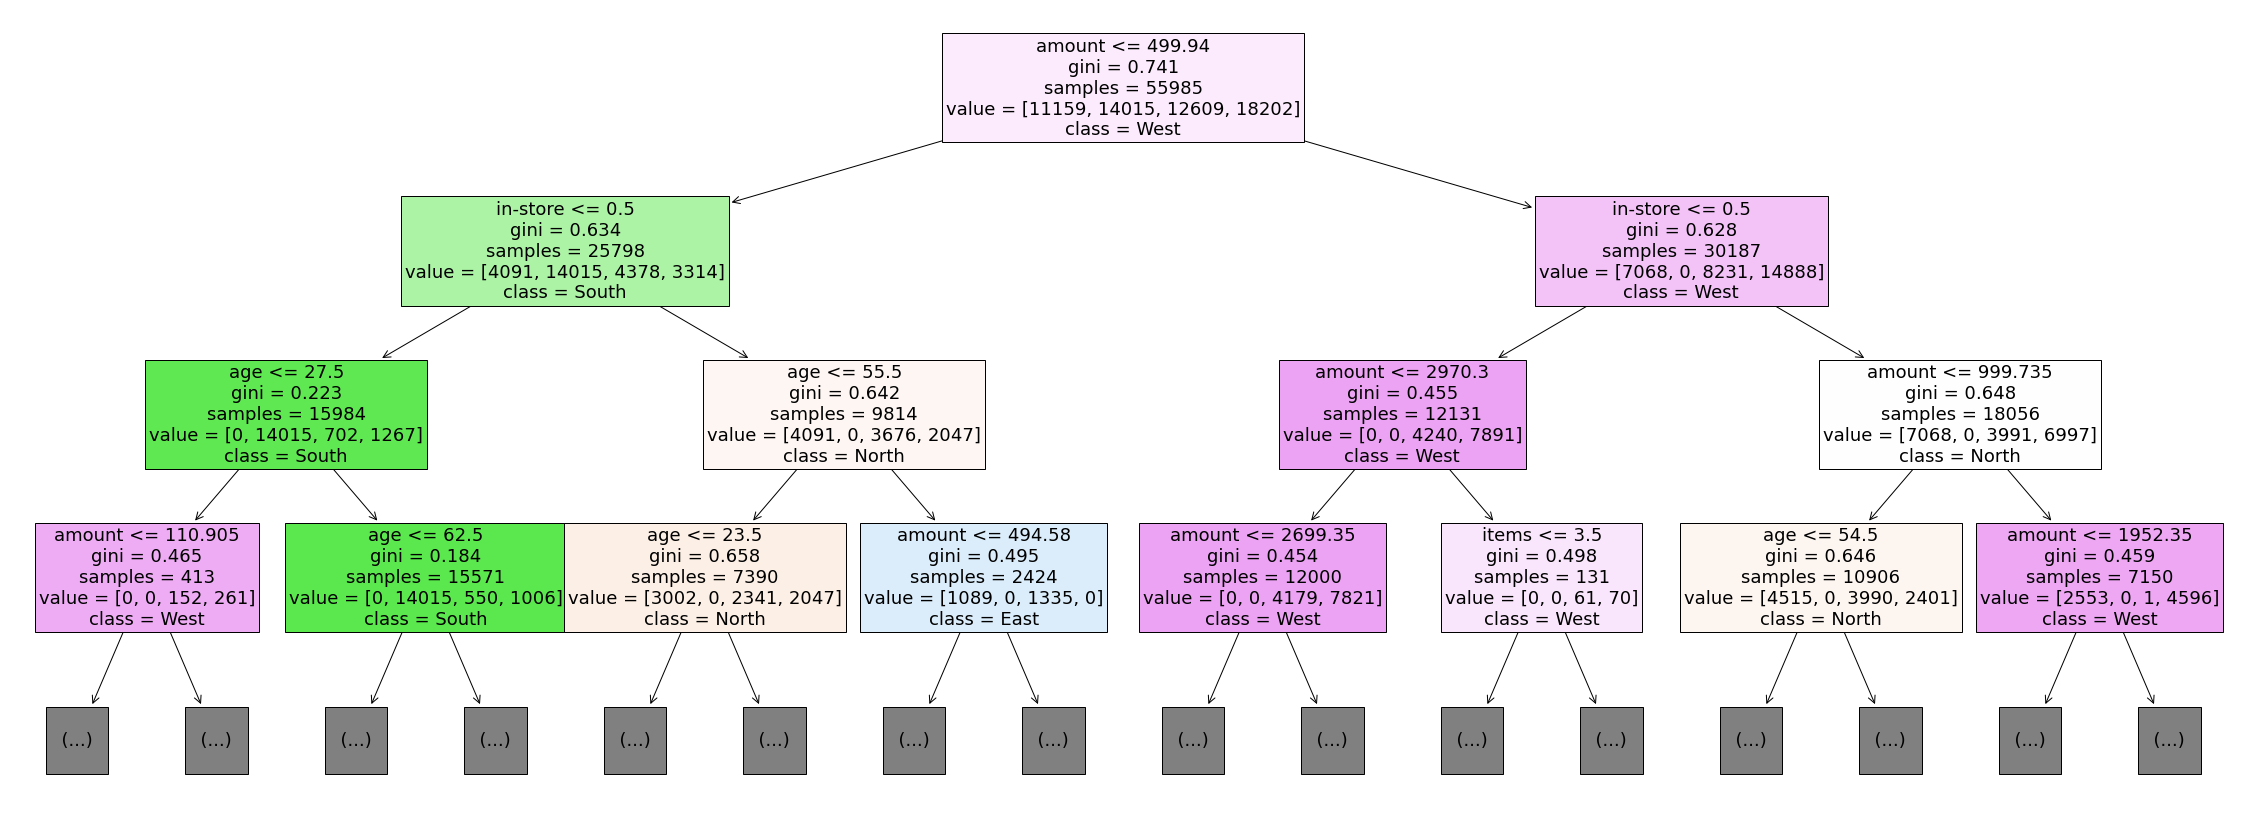

In [56]:
from sklearn.tree import plot_tree

class_names_regions = ['North', 'South', 'East', 'West']
fig = plt.figure(figsize=(40,15))
tree = plot_tree(model, feature_names=X.columns, class_names=class_names_regions, max_depth =3, fontsize=18, filled=True)


In this case, we are only using a Decision Tree model to predict the region. It's clear that the model is being a good predictor for the south, but it's missing in the other regions. Since our model is not giving us the best accuracy we might look for different alternatives to see if we can improve it. Let's start by discretizing age into equal width and equal frequency and run again our model.

<b> Equal Width Binning <b>

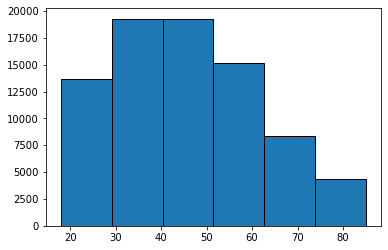

In [57]:
n, bins, patches = plt.hist(df['age'], edgecolor='black', bins=6)
plt.show()

Let's display bin boundaries and frequency per bin. 

In [58]:
bins, n

(array([18.        , 29.16666667, 40.33333333, 51.5       , 62.66666667,
        73.83333333, 85.        ]),
 array([13637., 19248., 19276., 15127.,  8364.,  4327.]))

We have 5 bins with different frequencies in each one of them.

In [59]:
def cut(arr):
    bins = np.empty(arr.shape[0])
    for idx, x in enumerate(arr):
        if (x >= 18) & (x < 29.17):
            bins[idx] = 1
        elif (x >= 29.17) & (x < 40.33):
            bins[idx] = 2
        elif (x >= 40.33) & (x < 62.67):
            bins[idx] = 3
        elif (x >= 62.67) & (x < 73.83):
            bins[idx] = 4
        elif (x >= 73.83) & (x < 85):
            bins[idx] = 5
        else:
            bins[idx] = 6

    return bins

In [60]:
df['width_age'] = cut(df['age'].to_numpy())

In [61]:
df.head()

,in-store,age,items,amount,region,Region_Name,purchase,width_age
0,0,37,4,281.03,2,South,Online,2.0
1,0,35,2,219.51,2,South,Online,2.0
2,1,45,3,1525.70,4,West,In-Store,3.0
3,1,46,3,715.25,3,East,In-Store,3.0
4,1,33,4,1937.50,1,North,In-Store,2.0


Let's run our Decision Tree model, we'll be using this time "age" discretized by equal width and without the variable "items" (our previous analysis made us believe that is not providing much information about our customers).

In [62]:
Z = df[['in-store', 'amount', 'width_age']]
print('Summary of feature sample')
Z.head()

Summary of feature sample


,in-store,amount,width_age
0,0,281.03,2.0
1,0,219.51,2.0
2,1,1525.70,3.0
3,1,715.25,3.0
4,1,1937.50,2.0


In [63]:
k = df['region']
k.head()

0    2
1    2
2    4
3    3
4    1
Name: region, dtype: int64

In [64]:
Z_train, Z_test, k_train, k_test = train_test_split(Z, k, test_size = .30, random_state = 123)

In [65]:
model1 = algo.fit(Z_train,k_train)

In [66]:
preds = model1.predict(Z_test)

In [67]:
print(classification_report(k_test, preds))

              precision    recall  f1-score   support

           1       0.40      0.41      0.41      4838
           2       0.91      0.90      0.90      5979
           3       0.36      0.37      0.37      5391
           4       0.52      0.51      0.52      7786

    accuracy                           0.56     23994
   macro avg       0.55      0.55      0.55     23994
weighted avg       0.56      0.56      0.56     23994



*The results are not better than the previous ones, let's try this time "age" descritize into equal frequency.

<b> Equal Frequency Binning <b>

In [68]:
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

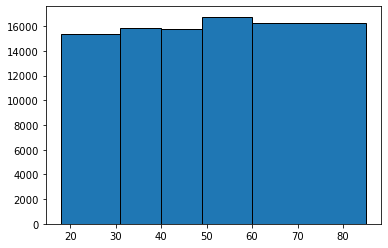

In [69]:
#create histogram with equal-frequency bins 
n, bins, patches = plt.hist(df['age'], equalObs(df['age'], 5), edgecolor='black')
plt.show()

*By the plot we can actually see it's dividing the age variables into bins that make sense, in this example:<br><br>
<b>Young Adults:</b>
- 18-30 (Group 1)
- 31-39 (Group 2)<br>

<b>Middle Aged Adults:</b>
- 40-48 (Group 1)
- 49-59 (Group 2)<br>

<b>Old Adults:</b>
- 60-85

In [70]:
#display bin boundaries and frequency per bin 
bins, n

(array([18., 31., 40., 49., 60., 85.]),
 array([15383., 15811., 15771., 16764., 16250.]))

In [71]:
def cut2(arr):
    bins2 = np.empty(arr.shape[0])
    for idx, x in enumerate(arr):
        if (x >= 18) & (x < 31):
            bins2[idx] = 1
        elif (x >= 31) & (x < 40):
            bins2[idx] = 2
        elif (x >= 40) & (x < 49):
            bins2[idx] = 3
        elif (x >= 49) & (x < 60):
            bins2[idx] = 4
        else:
            bins2[idx] = 5

    return bins2

In [72]:
df['frequency_age'] = cut2(df['age'].to_numpy())
df.head()

,in-store,age,items,amount,region,Region_Name,purchase,width_age,frequency_age
0,0,37,4,281.03,2,South,Online,2.0,2.0
1,0,35,2,219.51,2,South,Online,2.0,2.0
2,1,45,3,1525.70,4,West,In-Store,3.0,3.0
3,1,46,3,715.25,3,East,In-Store,3.0,3.0
4,1,33,4,1937.50,1,North,In-Store,2.0,2.0


Let's see how our model performs with the new binning

In [73]:
A = df[['in-store', 'amount', 'frequency_age']]
print('Summary of feature sample')
A.head()

Summary of feature sample


,in-store,amount,frequency_age
0,0,281.03,2.0
1,0,219.51,2.0
2,1,1525.70,3.0
3,1,715.25,3.0
4,1,1937.50,2.0


In [74]:
m = df['region']
m.head()

0    2
1    2
2    4
3    3
4    1
Name: region, dtype: int64

In [75]:
A_train, A_test, m_train, m_test = train_test_split(A, m, test_size = .30, random_state = 123)

In [76]:
model2 = algo.fit(A_train,m_train)

In [77]:
preds = model2.predict(A_test)

In [78]:
print(classification_report(m_test, preds))

              precision    recall  f1-score   support

           1       0.40      0.40      0.40      4838
           2       0.90      0.90      0.90      5979
           3       0.36      0.37      0.37      5391
           4       0.52      0.52      0.52      7786

    accuracy                           0.56     23994
   macro avg       0.55      0.55      0.55     23994
weighted avg       0.56      0.56      0.56     23994



*Judging by our results, binning age is not giving us a better accuracy in our Decision Trees model, maybe we can try with a different model and see if it fits better.

<b>Random-Forest Model</b>

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
modelRF = RandomForestClassifier(n_estimators=20)
modelRF.fit(A_train,m_train)

RandomForestClassifier(n_estimators=20)

In [81]:
modelRF.score(A_test, m_test)

0.5610569308993915

In [82]:
m_predicted = modelRF.predict(A_test)

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(m_test, m_predicted)
cm

array([[1931,    0, 1413, 1494],
       [   0, 5419,  192,  368],
       [1406,  212, 1974, 1799],
       [1450,  367, 1831, 4138]], dtype=int64)

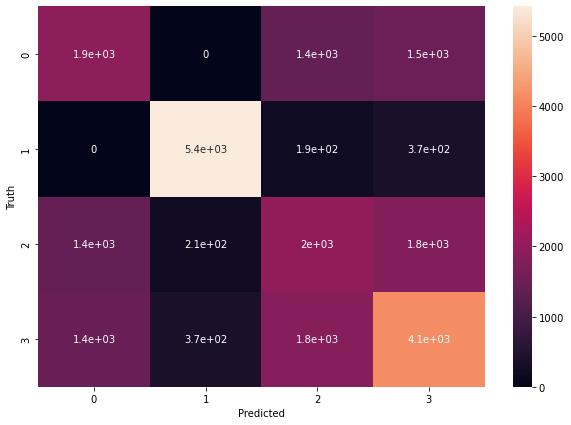

In [84]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

*The confusion matrix is pretty clear, it predicted correctly most of the values from the South region and also a significant amount from the west.

Let's try this time the Gradient-Boosting model.

<b> Gradient Boosting Model </b>

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [86]:
model_gbm = GradientBoostingClassifier()

In [87]:
model_gbm.fit(A_train, m_train)

GradientBoostingClassifier()

In [88]:
model_gbm.score(A_test, m_test)

0.628990580978578

Looks like we have a winner, the Gradient Boosting model is giving us the best accuracy of them all.

Still, we need to make a Cross-Validation to see which model performs best under these conditions.

<b>Cross-Validation</b>

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
print(cross_val_score(model, A, m, cv=3)) # cv = number of folds being held out

[0.55982746 0.5608027  0.55283394]


In [91]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

In [92]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, A,m, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [93]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.5610222461650898
Decision Tree Classifier 0.5578338679534657
Gradient Boosting Classifier 0.6317658379484777


*Our Cross-Validation is telling us that the model that fits better for this prediction is the Gradient Boosting model, still, the accuracy of our models is low for our purposes, so we will be using different features as dependent variables to see which one performs the best with different models.

#### In-store Prediction

<b>Decision-Trees Model <b>

In [94]:
V = df[['region', 'amount', 'width_age']]
print('Summary of feature sample')
V.head()

Summary of feature sample


,region,amount,width_age
0,2,281.03,2.0
1,2,219.51,2.0
2,4,1525.70,3.0
3,3,715.25,3.0
4,1,1937.50,2.0


In [95]:
h = df['in-store']
h.head()

0    0
1    0
2    1
3    1
4    1
Name: in-store, dtype: int64

In [96]:
V_train, V_test, h_train, h_test = train_test_split(V, h, test_size = .30, random_state = 123)

In [97]:
model3 = algo.fit(V_train,h_train)

In [98]:
preds = model3.predict(V_test)

In [99]:
print(classification_report(h_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     11874
           1       0.84      0.83      0.83     12120

    accuracy                           0.83     23994
   macro avg       0.83      0.83      0.83     23994
weighted avg       0.83      0.83      0.83     23994



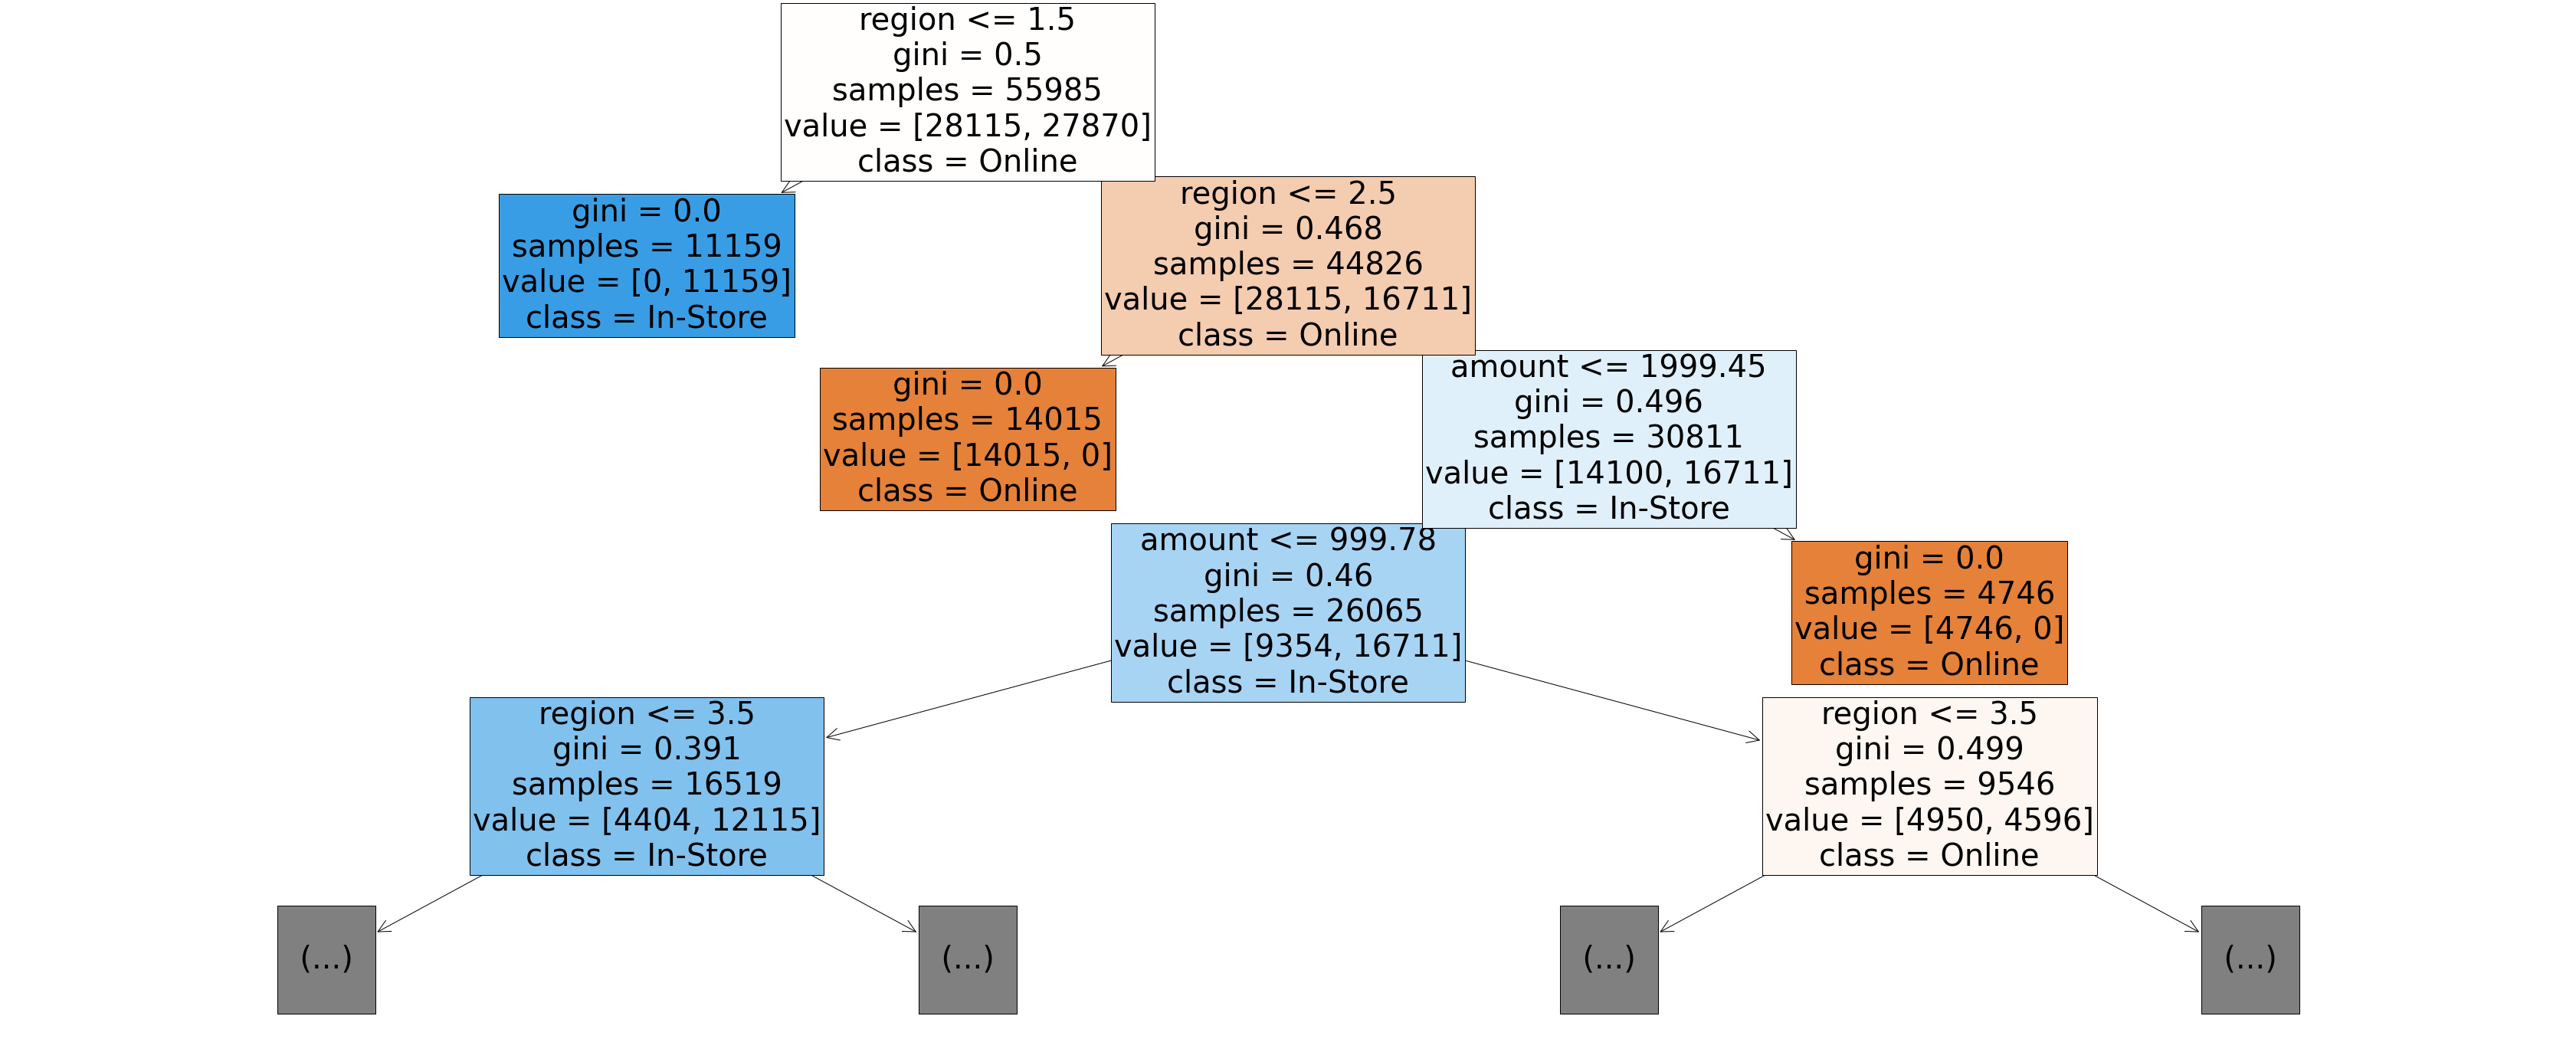

In [100]:
inStore_class = ['Online', 'In-Store']

fig3 = plt.figure(figsize=(60,25))
tree3 = plot_tree(model3, feature_names=V.columns, class_names=inStore_class, max_depth =4, fontsize=40, filled=True)

<b>Random Forest Model</b>

In [101]:
modelRF.fit(V_train,h_train)

RandomForestClassifier(n_estimators=20)

In [102]:
modelRF.score(V_test,h_test)

0.8342085521380345

In [103]:
h_predicted = modelRF.predict(V_test)

In [104]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(h_test, h_predicted)
cm1

array([[ 9899,  1975],
       [ 2003, 10117]], dtype=int64)

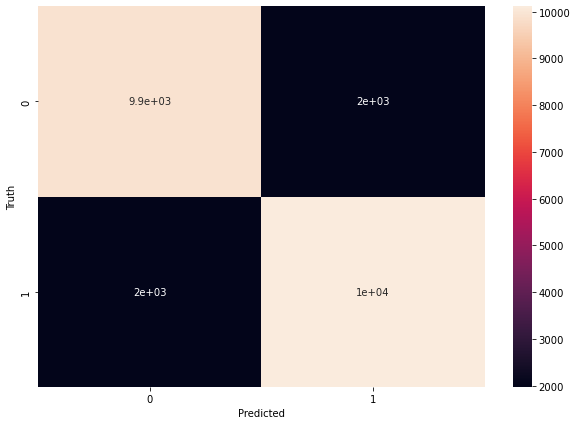

In [105]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<b> Gradient Boosting Model <b>

In [106]:
model_gbm.fit(V_train, h_train)

GradientBoostingClassifier()

In [107]:
len(model_gbm.estimators_)

100

<b> AUC </b>

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

AUC is desirable for the following two reasons:

- AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
- AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what   classification threshold is chosen.

In [108]:
h_train_pred = model_gbm.predict_proba(V_train)[:,1]
h_test_pred = model_gbm.predict_proba(V_test)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(h_train, h_train_pred),
                                                    roc_auc_score(h_test, h_test_pred)))

AUC Train: 0.9483
AUC Valid: 0.9474


In [109]:
h_train_pred_trees = np.stack(list(model_gbm.staged_predict_proba(V_train)))[:,:,1]
h_test_pred_trees = np.stack(list(model_gbm.staged_predict_proba(V_test)))[:,:,1]

h_train_pred_trees.shape, h_test_pred_trees.shape

((100, 55985), (100, 23994))

In [110]:
auc_train_trees = [roc_auc_score(h_train, h_pred) for h_pred in h_train_pred_trees]
auc_test_trees = [roc_auc_score(h_test, h_pred) for h_pred in h_test_pred_trees]

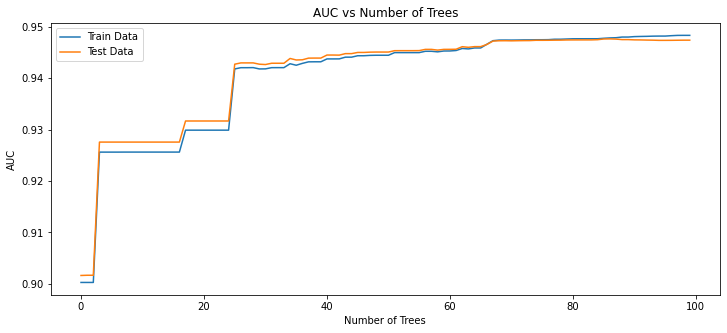

In [111]:
plt.figure(figsize=(12,5))

plt.plot(auc_train_trees, label='Train Data')
plt.plot(auc_test_trees, label='Test Data')

plt.title('AUC vs Number of Trees')
plt.ylabel('AUC')
plt.xlabel('Number of Trees')
plt.legend()

plt.show()

It looks like our model is not overfitted and that is actually a good predictor.

In [112]:
model_gbm.score(V_test,h_test)

0.8690089188963908

<b>Cross-Validation</b>

In [113]:
print(cross_val_score(model, V, h, cv=3)) # cv = number of folds being held out

[0.86642911 0.86646662 0.86492367]


In [114]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, V,h, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [115]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8329061423426302
Decision Tree Classifier 0.8318433794652197
Gradient Boosting Classifier 0.8659397964949432


*The Cross-Validation model is telling us that our models performed well and that it almost gave us the same accuracy between them. The models seem to be good predictors due to the accuracy being higher than 75%. GBM appears to be the one that performs best. 

Let's also try a Logistic Regression model for this classifier.

<b> Logistic Regression Model</b>

In [116]:
F = np.asarray(df[['region', 'amount', 'width_age']])
F[0:5]

array([[2.0000e+00, 2.8103e+02, 2.0000e+00],
       [2.0000e+00, 2.1951e+02, 2.0000e+00],
       [4.0000e+00, 1.5257e+03, 3.0000e+00],
       [3.0000e+00, 7.1525e+02, 3.0000e+00],
       [1.0000e+00, 1.9375e+03, 2.0000e+00]])

In [117]:
p = np.asarray(df['in-store'])
p [0:5]

array([0, 0, 1, 1, 1], dtype=int64)

In [118]:
from sklearn import preprocessing
F = preprocessing.StandardScaler().fit(F).transform(F)
F[0:5]

array([[-0.59905375, -0.76920443, -0.5982929 ],
       [-0.59905375, -0.85449971, -0.5982929 ],
       [ 1.17614475,  0.956486  ,  0.3462564 ],
       [ 0.2885455 , -0.16717393,  0.3462564 ],
       [-1.486653  ,  1.52743197, -0.5982929 ]])

In [119]:
F_train, F_test, p_train, p_test = train_test_split( F, p, test_size=0.3, random_state=4)
print ('Train set:', F_train.shape,  p_train.shape)
print ('Test set:', F_test.shape,  p_test.shape)

Train set: (55985, 3) (55985,)
Test set: (23994, 3) (23994,)


In [120]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(F_train,p_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [121]:
phat = LR.predict(F_test)
phat

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [122]:
phat_prob = LR.predict_proba(F_test)
phat_prob

array([[0.62539395, 0.37460605],
       [0.56973649, 0.43026351],
       [0.44828181, 0.55171819],
       ...,
       [0.52126574, 0.47873426],
       [0.37807277, 0.62192723],
       [0.32449659, 0.67550341]])

In [123]:
LR.score(F_test,p_test)

0.5665999833291656

In [124]:
from sklearn.metrics import jaccard_score
jaccard_score(p_test, phat, pos_label=0)

0.3969846332270223

In [125]:
print (classification_report(p_test, phat))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57     12009
           1       0.57      0.56      0.56     11985

    accuracy                           0.57     23994
   macro avg       0.57      0.57      0.57     23994
weighted avg       0.57      0.57      0.57     23994



In [126]:
cm3 = confusion_matrix(p_test, phat, labels=[1,0])
print(cm3)

[[6749 5236]
 [5163 6846]]


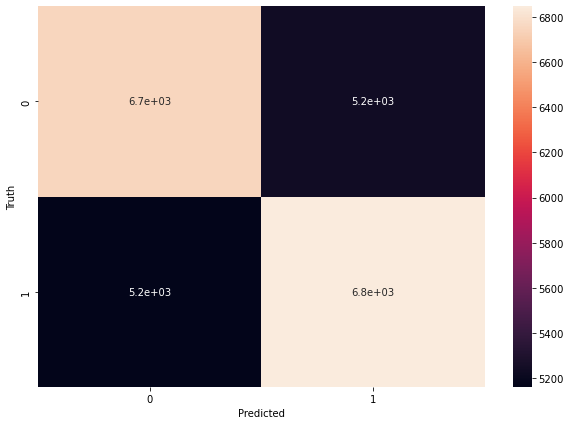

In [127]:
plt.figure(figsize=(10,7))
sns.heatmap(cm3, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

<b>Log-loss</b><br>
Now, let's try log loss for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1. Log-loss (Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [128]:
from sklearn.metrics import log_loss
log_loss(p_test, phat_prob)

0.6576387301630264

In [129]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(F_train,p_train)
phat_prob2 = LR2.predict_proba(F_test)
print ("LogLoss: : %.2f" % log_loss(p_test, phat_prob2))

LogLoss: : 0.66


In [130]:
round(LR2.score(F_test,p_test),2)

0.57

*Our Logistic Regression model has an accuracy way lower than our previous models for this kind of prediction. We'll be sticking with the Gradient Boosting model in this scenario.

#### Age Prediction

In this case we'll be using the variable age but discretize into frequency "equals" (frequency_age)

Decision Trees

In [131]:
S = df[['region', 'amount', 'in-store']]
print('Summary of feature sample')
S.head()

Summary of feature sample


,region,amount,in-store
0,2,281.03,0
1,2,219.51,0
2,4,1525.70,1
3,3,715.25,1
4,1,1937.50,1


In [132]:
e = df['frequency_age']
e.head()

0    2.0
1    2.0
2    3.0
3    3.0
4    2.0
Name: frequency_age, dtype: float64

In [133]:
S_train, S_test, e_train, e_test = train_test_split(S, e, test_size = .30, random_state = 123)

In [134]:
model4 = algo.fit(S_train,e_train)

In [135]:
preds = model4.predict(S_test)

In [136]:
print(classification_report(e_test, preds))

              precision    recall  f1-score   support

         1.0       0.26      0.28      0.27      4589
         2.0       0.21      0.21      0.21      4714
         3.0       0.21      0.21      0.21      4814
         4.0       0.21      0.20      0.20      4948
         5.0       0.35      0.33      0.34      4929

    accuracy                           0.25     23994
   macro avg       0.25      0.25      0.25     23994
weighted avg       0.25      0.25      0.25     23994



Cross-validation

In [137]:
print(cross_val_score(model, S, e, cv=3)) # cv = number of folds being held out

[0.3180045  0.31672918 0.31681608]


In [138]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, S,e, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [139]:
for i in range(len(names)):
    print(names[i],round(results[i].mean(),2))

Random Forest Classifier 0.25
Decision Tree Classifier 0.24
Gradient Boosting Classifier 0.32


*Even though the accuracy of the model is very low (24%-32% approximately), it performs better than if you randomly choose an age segmentation. In this case, the GBM also looks like the best model to predict our variable between the three models.

Let's try a different approach for this section, we'll be using the K-Nearest Neighbors model.

<b> K-Nearest Neighbors </b>

Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

In [140]:
G = df[['region', 'amount', 'in-store']] .values  #.astype(float)
G[0:5]

array([[2.0000e+00, 2.8103e+02, 0.0000e+00],
       [2.0000e+00, 2.1951e+02, 0.0000e+00],
       [4.0000e+00, 1.5257e+03, 1.0000e+00],
       [3.0000e+00, 7.1525e+02, 1.0000e+00],
       [1.0000e+00, 1.9375e+03, 1.0000e+00]])

In [141]:
G = preprocessing.StandardScaler().fit(G).transform(G.astype(float))
G[0:5]

array([[-0.59905375, -0.76920443, -1.0000125 ],
       [-0.59905375, -0.85449971, -1.0000125 ],
       [ 1.17614475,  0.956486  ,  0.9999875 ],
       [ 0.2885455 , -0.16717393,  0.9999875 ],
       [-1.486653  ,  1.52743197,  0.9999875 ]])

In [142]:
w = df['frequency_age'].values
w[0:5]

array([2., 2., 3., 3., 2.])

In [143]:
G_train, G_test, w_train, w_test = train_test_split(G, w, test_size = .30, random_state = 123)

In [144]:
from sklearn.neighbors import KNeighborsClassifier

In [145]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(G_train, w_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [146]:
what = neigh.predict(G_test)
what[0:5]

array([5., 4., 5., 5., 2.])

<b>Accuracy evaluation</b>

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [147]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(w_train, neigh.predict(G_train)))
print("Test set Accuracy: ", metrics.accuracy_score(w_test, what))

Train set Accuracy:  0.5237831562025542
Test set Accuracy:  0.2562307243477536


Let's try k=6

In [148]:
# write your code here
k = 6 
neigh2 = KNeighborsClassifier(n_neighbors = k).fit(G_train,w_train)

what = neigh2.predict(G_test)


print("Train set Accuracy: ", metrics.accuracy_score(w_train, neigh2.predict(G_train)))
print("Test set Accuracy: ", metrics.accuracy_score(w_test, what))

Train set Accuracy:  0.46953648298651424
Test set Accuracy:  0.26373259981662084


<b> What about other K? </b>

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.


<b> Plot the model accuracy for a different number of neighbors.<b>

In [149]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(G_train,w_train)
    what=neigh.predict(G_test)
    mean_acc[n-1] = metrics.accuracy_score(w_test, what)

    
    std_acc[n-1]=np.std(what==w_test)/np.sqrt(what.shape[0])

mean_acc

array([0.24897891, 0.23189131, 0.24818705, 0.25623072, 0.2591898 ,
       0.2637326 , 0.26435776, 0.26669167, 0.27048429])

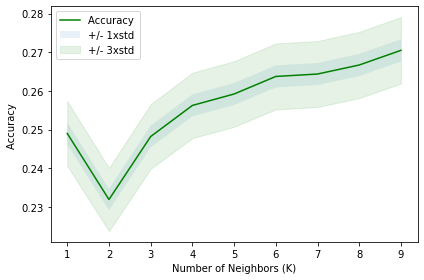

In [150]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

As our results show, KNN is not giving us a better performance than our previous models, in this case, with k=9 we get an accuracy of about 27%, still in the range talked about in the previous models.

#### Amount  Prediction 

In [151]:
df['amount'] = round(df['amount'], 2)
df.head()

,in-store,age,items,amount,region,Region_Name,purchase,width_age,frequency_age
0,0,37,4,281.03,2,South,Online,2.0,2.0
1,0,35,2,219.51,2,South,Online,2.0,2.0
2,1,45,3,1525.70,4,West,In-Store,3.0,3.0
3,1,46,3,715.25,3,East,In-Store,3.0,3.0
4,1,33,4,1937.50,1,North,In-Store,2.0,2.0


Let's discretize amount and run some models using it as the dependent variable.

(array([21553., 19284., 11458.,  7151.,  5180.,  5156.,  4126.,  2014.,
         2045.,  2012.]),
 array([   5. ,  304.5,  604. ,  903.5, 1203. , 1502.5, 1802. , 2101.5,
        2401. , 2700.5, 3000. ]),
 <BarContainer object of 10 artists>)

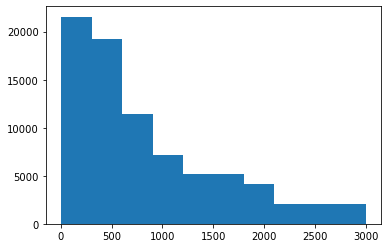

In [152]:
plt.hist(df['amount'])

By looking at the histogram, if we discretize the amount by the same width we'll probably have a biased unbalanced variable, so we'll discretize it by equal frequency at first and try to see how it goes.

In [153]:
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

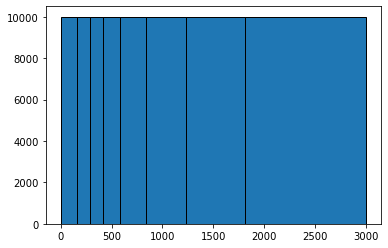

In [154]:
#create histogram with equal-frequency bins 
n, bins, patches = plt.hist(df['amount'], equalObs(df['amount'], 8), edgecolor='black')
plt.show()

In [155]:
bins, n

(array([   5.     ,  158.31   ,  285.125  ,  411.88125,  582.18   ,
         841.3525 , 1233.4    , 1813.5    , 3000.     ]),
 array([9997., 9998., 9998., 9997., 9997., 9995., 9999., 9998.]))

We have 8 bins with equal frequencies in each one of them.

In [156]:
def cut(arr):
    bins = np.empty(arr.shape[0])
    for idx, x in enumerate(arr):
        if (x >= 5) & (x < 158.31):
            bins[idx] = 1
        elif (x >= 158.31) & (x < 285.125):
            bins[idx] = 2
        elif (x >= 285.125) & (x < 411.88125):
            bins[idx] = 3
        elif (x >= 411.88125) & (x < 582.18):
            bins[idx] = 4
        elif (x >= 582.18) & (x < 841.3525):
            bins[idx] = 5
        elif (x >= 841.3525) & (x < 1233.4):
            bins[idx] = 6
        elif (x >= 1233.43) & (x < 1813.5):
            bins[idx] = 7
        else:
            bins[idx] = 8

    return bins

In [157]:
df['discretize_amount'] = cut(df['amount'].to_numpy())
df['discretize_amount'] = pd.cut(df['amount'], bins=8)
df.head()

,in-store,age,items,amount,region,Region_Name,purchase,width_age,frequency_age,discretize_amount
0,0,37,4,281.03,2,South,Online,2.0,2.0,"(2.005, 379.375]"
1,0,35,2,219.51,2,South,Online,2.0,2.0,"(2.005, 379.375]"
2,1,45,3,1525.70,4,West,In-Store,3.0,3.0,"(1502.5, 1876.875]"
3,1,46,3,715.25,3,East,In-Store,3.0,3.0,"(379.375, 753.75]"
4,1,33,4,1937.50,1,North,In-Store,2.0,2.0,"(1876.875, 2251.25]"


In [158]:
set(df['discretize_amount'])

{Interval(2.005, 379.375, closed='right'),
 Interval(379.375, 753.75, closed='right'),
 Interval(753.75, 1128.125, closed='right'),
 Interval(1128.125, 1502.5, closed='right'),
 Interval(1502.5, 1876.875, closed='right'),
 Interval(1876.875, 2251.25, closed='right'),
 Interval(2251.25, 2625.625, closed='right'),
 Interval(2625.625, 3000.0, closed='right')}

In [159]:
R = df[['region', 'in-store', 'frequency_age']]
print('Summary of feature sample')
R.head()

Summary of feature sample


,region,in-store,frequency_age
0,2,0,2.0
1,2,0,2.0
2,4,1,3.0
3,3,1,3.0
4,1,1,2.0


In [160]:
df['discretize_amount'] = df['discretize_amount'].astype(str)

In [161]:
j = df['discretize_amount']
j.head()

0       (2.005, 379.375]
1       (2.005, 379.375]
2     (1502.5, 1876.875]
3      (379.375, 753.75]
4    (1876.875, 2251.25]
Name: discretize_amount, dtype: object

In [162]:
R_train, R_test, j_train, j_test = train_test_split(R, j, test_size = .30, random_state = 123)

In [163]:
len(j_test)

23994

In [164]:
set(j_test)

{'(1128.125, 1502.5]',
 '(1502.5, 1876.875]',
 '(1876.875, 2251.25]',
 '(2.005, 379.375]',
 '(2251.25, 2625.625]',
 '(2625.625, 3000.0]',
 '(379.375, 753.75]',
 '(753.75, 1128.125]'}

In [165]:
modelRF = RandomForestClassifier(n_estimators=200)
modelRF.fit(R_train,j_train)
preds = modelRF.predict(R_test)
print(classification_report(j_test, preds))

                     precision    recall  f1-score   support

 (1128.125, 1502.5]       0.13      0.08      0.10      1916
 (1502.5, 1876.875]       0.15      0.24      0.19      1970
(1876.875, 2251.25]       0.12      0.10      0.11      1127
   (2.005, 379.375]       0.76      0.55      0.64      8224
(2251.25, 2625.625]       0.00      0.00      0.00       751
 (2625.625, 3000.0]       0.00      0.00      0.00       741
  (379.375, 753.75]       0.32      0.54      0.40      5758
 (753.75, 1128.125]       0.15      0.12      0.13      3507

           accuracy                           0.37     23994
          macro avg       0.20      0.20      0.20     23994
       weighted avg       0.39      0.37      0.36     23994



In [166]:
modelRF.score(R_test,j_test)

0.367425189630741

In [167]:
modelDT = DecisionTreeClassifier()
modelDT.fit(R_train,j_train)
preds = modelDT.predict(R_test)
print(classification_report(j_test, preds))

                     precision    recall  f1-score   support

 (1128.125, 1502.5]       0.13      0.08      0.10      1916
 (1502.5, 1876.875]       0.15      0.24      0.19      1970
(1876.875, 2251.25]       0.12      0.10      0.11      1127
   (2.005, 379.375]       0.76      0.55      0.64      8224
(2251.25, 2625.625]       0.00      0.00      0.00       751
 (2625.625, 3000.0]       0.00      0.00      0.00       741
  (379.375, 753.75]       0.32      0.54      0.40      5758
 (753.75, 1128.125]       0.15      0.12      0.13      3507

           accuracy                           0.37     23994
          macro avg       0.20      0.20      0.20     23994
       weighted avg       0.39      0.37      0.36     23994



In [168]:
modelDT.score(R_test,j_test)

0.367425189630741

In [169]:
modelGB = GradientBoostingClassifier()
modelGB.fit(R_train,j_train)

GradientBoostingClassifier()

In [170]:
modelGB.score(R_test,j_test)

0.3668417104276069

In [171]:
#modelGB = GradientBoostingClassifier()
#modelGB.fit(R_train,j_train)
preds = modelGB.predict(R_test)
print(classification_report(j_test, preds))

                     precision    recall  f1-score   support

 (1128.125, 1502.5]       0.13      0.08      0.10      1916
 (1502.5, 1876.875]       0.15      0.22      0.18      1970
(1876.875, 2251.25]       0.12      0.10      0.11      1127
   (2.005, 379.375]       0.76      0.55      0.64      8224
(2251.25, 2625.625]       0.00      0.00      0.00       751
 (2625.625, 3000.0]       0.11      0.11      0.11       741
  (379.375, 753.75]       0.31      0.55      0.40      5758
 (753.75, 1128.125]       0.16      0.09      0.12      3507

           accuracy                           0.37     23994
          macro avg       0.22      0.21      0.21     23994
       weighted avg       0.39      0.37      0.36     23994



In [172]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, R,j, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [173]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.368471741608458
Decision Tree Classifier 0.36807163548642513
Gradient Boosting Classifier 0.36867178552393454


It looks like our three models are giving us almost the exact same results, it may be due to the fact that we are using all categorical variables as predictors for our model. But let's try a different approach and see if it performs better.

Dummifying independent variables

In [174]:
df6 = pd.get_dummies(df['region'])

In [175]:
df6.columns = ['North','South', 'East', 'West']

In [176]:
df6

,North,South,East,West
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
79995,1,0,0,0
79996,0,0,1,0
79997,0,1,0,0
79998,1,0,0,0


In [177]:
frames = [df,df6]

In [178]:
df6 = pd.concat(frames, axis=1)

In [179]:
df6

,in-store,age,items,amount,region,Region_Name,purchase,width_age,frequency_age,discretize_amount,North,South,East,West
0,0,37,4,281.03,2,South,Online,2.0,2.0,"(2.005, 379.375]",0,1,0,0
1,0,35,2,219.51,2,South,Online,2.0,2.0,"(2.005, 379.375]",0,1,0,0
2,1,45,3,1525.70,4,West,In-Store,3.0,3.0,"(1502.5, 1876.875]",0,0,0,1
3,1,46,3,715.25,3,East,In-Store,3.0,3.0,"(379.375, 753.75]",0,0,1,0
4,1,33,4,1937.50,1,North,In-Store,2.0,2.0,"(1876.875, 2251.25]",1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,1,71,3,558.82,1,North,In-Store,4.0,5.0,"(379.375, 753.75]",1,0,0,0
79996,0,59,7,1932.00,3,East,Online,3.0,4.0,"(1876.875, 2251.25]",0,0,1,0
79997,0,54,1,414.16,2,South,Online,3.0,4.0,"(379.375, 753.75]",0,1,0,0
79998,1,49,4,335.32,1,North,In-Store,3.0,4.0,"(2.005, 379.375]",1,0,0,0


In [180]:
df4 = pd.get_dummies(df['frequency_age'])
df4.columns = ['descretize_1','descretize_2','descretize_3','descretize_4','descretize_5']

In [181]:
df4

,descretize_1,descretize_2,descretize_3,descretize_4,descretize_5
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0
...,...,...,...,...,...
79995,0,0,0,0,1
79996,0,0,0,1,0
79997,0,0,0,1,0
79998,0,0,0,1,0


In [182]:
frames = [df6,df4]

In [183]:
df4 = pd.concat(frames, axis=1)

In [184]:
df4

,in-store,age,items,amount,region,Region_Name,purchase,width_age,frequency_age,discretize_amount,North,South,East,West,descretize_1,descretize_2,descretize_3,descretize_4,descretize_5
0,0,37,4,281.03,2,South,Online,2.0,2.0,"(2.005, 379.375]",0,1,0,0,0,1,0,0,0
1,0,35,2,219.51,2,South,Online,2.0,2.0,"(2.005, 379.375]",0,1,0,0,0,1,0,0,0
2,1,45,3,1525.70,4,West,In-Store,3.0,3.0,"(1502.5, 1876.875]",0,0,0,1,0,0,1,0,0
3,1,46,3,715.25,3,East,In-Store,3.0,3.0,"(379.375, 753.75]",0,0,1,0,0,0,1,0,0
4,1,33,4,1937.50,1,North,In-Store,2.0,2.0,"(1876.875, 2251.25]",1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,1,71,3,558.82,1,North,In-Store,4.0,5.0,"(379.375, 753.75]",1,0,0,0,0,0,0,0,1
79996,0,59,7,1932.00,3,East,Online,3.0,4.0,"(1876.875, 2251.25]",0,0,1,0,0,0,0,1,0
79997,0,54,1,414.16,2,South,Online,3.0,4.0,"(379.375, 753.75]",0,1,0,0,0,0,0,1,0
79998,1,49,4,335.32,1,North,In-Store,3.0,4.0,"(2.005, 379.375]",1,0,0,0,0,0,0,1,0


In [185]:
X = df4[['age', 'in-store', 'North', 'South', 'East', 'West']]
X

,age,in-store,North,South,East,West
0,37,0,0,1,0,0
1,35,0,0,1,0,0
2,45,1,0,0,0,1
3,46,1,0,0,1,0
4,33,1,1,0,0,0
...,...,...,...,...,...,...
79995,71,1,1,0,0,0
79996,59,0,0,0,1,0
79997,54,0,0,1,0,0
79998,49,1,1,0,0,0


In [186]:
y = df['discretize_amount']
y

0           (2.005, 379.375]
1           (2.005, 379.375]
2         (1502.5, 1876.875]
3          (379.375, 753.75]
4        (1876.875, 2251.25]
                ...         
79995      (379.375, 753.75]
79996    (1876.875, 2251.25]
79997      (379.375, 753.75]
79998       (2.005, 379.375]
79999      (379.375, 753.75]
Name: discretize_amount, Length: 79979, dtype: object

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [188]:
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train,y_train)
preds = modelDT.predict(X_test)
print(classification_report(y_test, preds))

                     precision    recall  f1-score   support

 (1128.125, 1502.5]       0.17      0.17      0.17      1916
 (1502.5, 1876.875]       0.17      0.16      0.16      1970
(1876.875, 2251.25]       0.13      0.07      0.09      1127
   (2.005, 379.375]       0.64      0.63      0.64      8224
(2251.25, 2625.625]       0.12      0.13      0.13       751
 (2625.625, 3000.0]       0.12      0.14      0.13       741
  (379.375, 753.75]       0.31      0.41      0.35      5758
 (753.75, 1128.125]       0.16      0.10      0.13      3507

           accuracy                           0.37     23994
          macro avg       0.23      0.23      0.22     23994
       weighted avg       0.36      0.37      0.36     23994



In [189]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [190]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.3648458196547712
Decision Tree Classifier 0.3639705797449775
Gradient Boosting Classifier 0.3656709818701534


Even after dummifying the region and using 'age' as a numerical value we are having slightly better results as before, between 36-37% of accuracy and similar scores between the three models.

<b> In-store Column Mapping: </b><br>
- 1: in-store purchases<br>
- 0: online purchases

<b>Young Adults:</b>
- 18-30 (Group 1)
- 31-39 (Group 2)<br>

<b>Middle Aged Adults:</b>
- 40-48 (Group 1)
- 49-59 (Group 2)<br>

<b>Old Adults:</b>
- 60-85

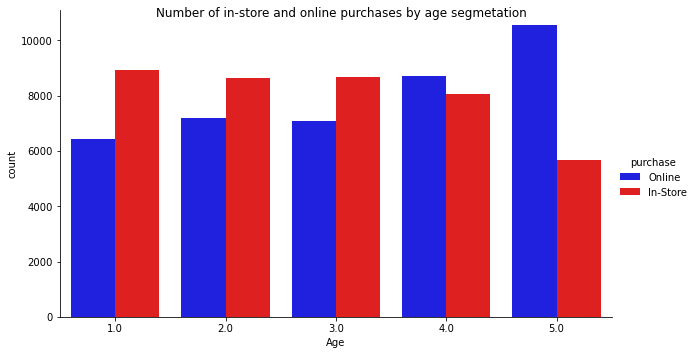

In [191]:
store_online = df.groupby(['purchase', 'frequency_age'])['in-store'].count()
store_online

g = sns.factorplot('frequency_age', data=df, hue='purchase', kind='count', aspect=1.75,palette=['b','r'])
g.fig.suptitle('Number of in-store and online purchases by age segmetation')
g.set_xlabels('Age')

If we analyze this graph we might believe that older people actually tend to purchase more online than in-store. But the thing is, that in this data-set, as we commented before, there is a bigger density of older people living in the south where you can only purchase via online. To actually analyze if older people tend to purchase more in-store or online, we need to drop both regions where it's completely unbalanced and analyze the ones that have both, in this case, the west and the east (we'll be dropping North and South from our dataset).

In [192]:
df5 = df[(df.region != 1) & (df.region != 2)] 

In [193]:
df5

,in-store,age,items,amount,region,Region_Name,purchase,width_age,frequency_age,discretize_amount
2,1,45,3,1525.70,4,West,In-Store,3.0,3.0,"(1502.5, 1876.875]"
3,1,46,3,715.25,3,East,In-Store,3.0,3.0,"(379.375, 753.75]"
5,0,24,3,1314.20,4,West,Online,1.0,1.0,"(1128.125, 1502.5]"
7,1,66,5,819.98,3,East,In-Store,4.0,5.0,"(753.75, 1128.125]"
10,1,44,5,122.39,3,East,In-Store,3.0,3.0,"(2.005, 379.375]"
...,...,...,...,...,...,...,...,...,...,...
79991,0,37,4,658.00,4,West,Online,2.0,2.0,"(379.375, 753.75]"
79993,1,47,3,337.54,3,East,In-Store,3.0,3.0,"(2.005, 379.375]"
79994,0,22,1,698.54,4,West,Online,1.0,1.0,"(379.375, 753.75]"
79996,0,59,7,1932.00,3,East,Online,3.0,4.0,"(1876.875, 2251.25]"


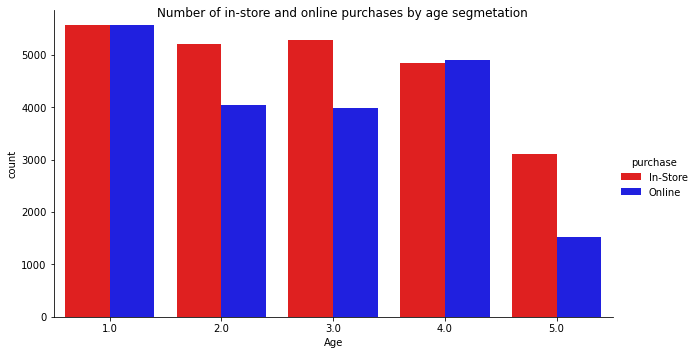

In [194]:
store_online = df.groupby(['purchase', 'frequency_age'])['purchase'].count()
store_online

g = sns.factorplot('frequency_age', data=df5, hue='purchase', kind='count', aspect=1.75, palette=['r','b'])
g.fig.suptitle('Number of in-store and online purchases by age segmetation')
g.set_xlabels('Age')

We can now see by this graph that the VP of sales, Martin Goodrich is actually right, given the segmentation explained before, we can see that older people (#5 Old Adults: 60-85) tend to purchase more in-store than online.

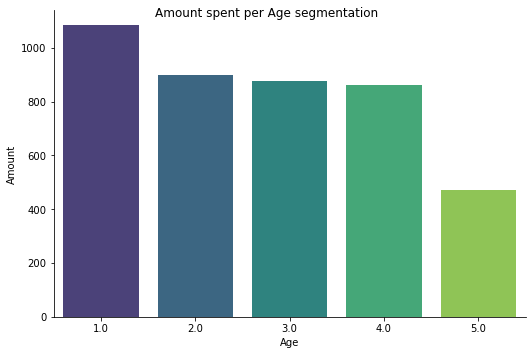

In [195]:
prueba = df.groupby(['frequency_age'])['amount'].mean()
prueba = pd.DataFrame(prueba)
prueba.reset_index(inplace=True)
fg = sns.factorplot('frequency_age', 'amount', data=prueba, kind='bar', aspect=1.5, palette="viridis", alpha=1)
fg.fig.suptitle('Amount spent per Age segmentation')
fg.set_xlabels('Age')
fg.set_ylabels('Amount')

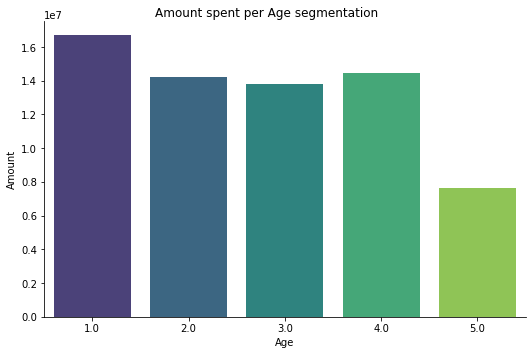

In [196]:
prueba = df.groupby(['frequency_age'])['amount'].sum()
prueba = pd.DataFrame(prueba)
prueba.reset_index(inplace=True)
fg = sns.factorplot('frequency_age', 'amount', data=prueba, kind='bar', aspect=1.5, palette="viridis", alpha=1)
fg.fig.suptitle('Amount spent per Age segmentation')
fg.set_xlabels('Age')
fg.set_ylabels('Amount')

In this graph we can see that older people are not spending more than the entire segmentation, as we can see, is actually the total opposite of it.

### Conclusions

- We could actually see differences in the age of customers between regions. We established initially three models that could predict Age based on the demographic characteristics we have. "Items" were excluded in the models due to not providing sufficient information about our customers. After doing some discretization to our variable "age" we could see that our models were not performing as good as we wanted, we were getting accuracies around 25 and 32 percent (Gradient Boosting being our go to model). We did try a different model for our purposes and ran a K Nearest Neighbors model to see how it would perform and the results weren't different at all, an accuracy around 25%. Even though our model is giving us better performance than if we choose a random value from our discretized variables it's still not giving us the performance we were looking for.

-  There is some interesting correlation between the age of a customer and if the transaction was made online or in-store, even though our correlation matrix didn't show us a significant value (-0.18) between the two. After analyzing a box plot and density graph between these two variables we could see that there indeed was a relation between both. But this could be miss understood if we didn't go deeper into it. Looking at our data we could see that there were two regions that could only purchase in-store and online, the north can only purchase in-store, and the south can only purchase online. We could also see that there was a higher density of older people in the transactions made in the south, so this could be misleading when analyzing our data. When looking at the entire dataset, we could see that our bar plot was showing us that older people tend to do more online purchases, but this could be because of the south situation, so when we dropped north and south from our dataset to analyze how's the situation in the east and west (were people have both options available), our graph tells us a different story, it actually tells us that older people do tend to purchase more in-store than online.

- Also, we could see that older people don't spend more money on electronics than younger people, it's quite the opposite of it. Our graph bar showed us, using the median of amount spent per age segmentation, that actually younger people tend to spend more on electronics than older segmentations.

- We also used some ML models to predict if a customer would buy in-store or online. Our three main models gave us a good accuracy for our purposes, we decided to use "region", "age discretized by equal width" and "amount". The three models had an accuracy higher than 75%, in the range of 83 to 86 percent, with the Gradient Boosting model being the one that performed best. We also tried a different model for this task and tried a Logistic Regression model to see if it would perform similar or better than our previous models. Unfortunately the LR model didn't perform as well as the others giving us an accuracy around 57% and a log-loss of 67%. All around, we did find a good predictor for this variable and establish that the features that were included into the model were the right ones for our prediction.